In [1]:
import pandas as pd
import pyreadstat
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('df_2020.csv')

In [3]:
df.drop(columns=['curr_econ_sit'], inplace=True)

In [4]:
df.columns.tolist()

['churchill_q',
 'satis_demo',
 'citiz_count',
 'left_right_scale',
 'satisf_life',
 'all_or_powerful',
 'gov_led_approve',
 'fair_income_dist',
 'past_econ_sit',
 'future_econ_sit',
 'future_personal_econ',
 'satisf_econ_gen',
 'no_food_freq',
 'comp',
 'wash_machine',
 'fixed_tel',
 'mob_tel',
 'smart',
 'auto',
 'sew',
 'water',
 'hot_water',
 'own_home',
 'dif_room',
 'hot_meal_day',
 'degree_corrup_prob',
 'trust_people',
 'conf_gov',
 'conf_police',
 'conf_political',
 'worry_victim_crime',
 'op_usa',
 'sex',
 'age',
 'income_earner',
 'type_educ',
 'parents_educ',
 'percep_socioec_stat',
 'country',
 'town_size',
 'asian',
 'black',
 'indigenous',
 'mestizo',
 'mulato',
 'white',
 'prog',
 'retro',
 'self_emp',
 'sal_emp_pub',
 'sal_emp_priv',
 'temp_out_of_work',
 'retired',
 'dont_work',
 'student',
 'very_con',
 'con',
 'lit_con',
 'not_con',
 'you_vict',
 'relat_vict',
 'social_net']

In [5]:
df.shape

(11941, 62)

## Separando em treino e teste

In [6]:
x = df.drop('satisf_econ_gen', axis=1)
y = df['satisf_econ_gen']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [8]:
df['satisf_econ_gen'].value_counts()

0.0    9959
1.0    1982
Name: satisf_econ_gen, dtype: int64

In [9]:
df['satisf_econ_gen'].value_counts(normalize=True) * 100

0.0    83.401725
1.0    16.598275
Name: satisf_econ_gen, dtype: float64

In [10]:
x_train.shape

(8358, 61)

In [11]:
x_test.shape

(3583, 61)

In [12]:
df

,churchill_q,satis_demo,citiz_count,left_right_scale,satisf_life,all_or_powerful,gov_led_approve,fair_income_dist,past_econ_sit,future_econ_sit,...,retired,dont_work,student,very_con,con,lit_con,not_con,you_vict,relat_vict,social_net
0,2.0,4.0,1.0,6.0,2.0,1.0,0.0,3.0,4.0,2.0,...,0,0,0,0,0,0,0,0,0,3.0
1,2.0,3.0,1.0,10.0,3.0,1.0,1.0,3.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,3.0
2,3.0,4.0,1.0,8.0,1.0,1.0,1.0,1.0,4.0,2.0,...,0,0,0,0,0,0,1,0,0,2.0
3,2.0,3.0,1.0,5.0,1.0,1.0,0.0,1.0,5.0,5.0,...,0,0,0,0,0,0,1,0,0,2.0
4,2.0,3.0,1.0,7.0,2.0,1.0,0.0,3.0,3.0,3.0,...,0,0,0,1,0,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11936,2.0,4.0,1.0,10.0,3.0,1.0,0.0,3.0,4.0,2.0,...,1,0,0,0,0,0,0,1,1,0.0
11937,2.0,4.0,1.0,5.0,3.0,1.0,0.0,4.0,5.0,5.0,...,0,1,0,0,0,0,0,0,1,2.0
11938,3.0,3.0,1.0,5.0,1.0,1.0,0.0,3.0,4.0,5.0,...,0,1,0,0,0,0,0,0,0,7.0
11939,3.0,3.0,1.0,5.0,1.0,1.0,0.0,3.0,5.0,5.0,...,0,1,0,0,0,0,0,0,0,1.0


## Balanceamento por undersample

In [13]:
#undersample = RandomUnderSampler()

In [14]:
#x_train, y_train = undersample.fit_resample(x_train, y_train)

# SMOTE

In [15]:
#smt = SMOTE()

In [16]:
#x_train, y_train = smt.fit_resample(x_train, y_train)

## Normalizando

In [17]:
#sc = StandardScaler()

In [18]:
#x_train = sc.fit_transform(x_train)
#x_test = sc.fit_transform(x_test)

# Gradient Boosting Classifier

In [19]:
gbc = GradientBoostingClassifier()

In [20]:
gbc.fit(x_train,y_train)

pred_gbc = gbc.predict(x_test)

print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      2989
         1.0       0.62      0.44      0.52       594

    accuracy                           0.86      3583
   macro avg       0.76      0.70      0.72      3583
weighted avg       0.85      0.86      0.85      3583



In [21]:
importancias_gbc = pd.DataFrame({"Atributo": x.columns,
                            "Valor": gbc.feature_importances_})
importancias_gbc.sort_values("Valor", ascending=False).head(10)

,Atributo,Valor
1,satis_demo,0.527186
8,past_econ_sit,0.119904
7,fair_income_dist,0.064163
26,conf_gov,0.058518
45,prog,0.054289
5,all_or_powerful,0.024716
27,conf_police,0.017771
4,satisf_life,0.016150
9,future_econ_sit,0.014195
37,country,0.012341


## XGB

In [22]:
xgb = XGBClassifier(n_jobs=-1)

In [23]:
xgb.fit(x_train,y_train)

pred_xgb = xgb.predict(x_test)

print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      2989
         1.0       0.61      0.45      0.51       594

    accuracy                           0.86      3583
   macro avg       0.75      0.69      0.72      3583
weighted avg       0.85      0.86      0.85      3583



In [24]:
importancias_xgb = pd.DataFrame({"Atributo": x.columns,
                            "Valor": xgb.feature_importances_})
importancias_xgb.sort_values("Valor", ascending=False).head(10)

,Atributo,Valor
1,satis_demo,0.157031
8,past_econ_sit,0.043458
45,prog,0.032509
7,fair_income_dist,0.027210
26,conf_gov,0.025265
41,indigenous,0.019334
57,not_con,0.019176
19,water,0.017868
27,conf_police,0.016568
53,student,0.016498


## Random Forest

In [25]:
rf = RandomForestClassifier(n_jobs=-1)

In [26]:
rf.fit(x_train,y_train)

pred_rf = rf.predict(x_test)

print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2989
         1.0       0.65      0.35      0.45       594

    accuracy                           0.86      3583
   macro avg       0.77      0.65      0.69      3583
weighted avg       0.84      0.86      0.84      3583



In [27]:
importancias_rf = pd.DataFrame({"Atributo": x.columns,
                            "Valor": rf.feature_importances_})
importancias_rf.sort_values("Valor", ascending=False).head(10)

,Atributo,Valor
1,satis_demo,0.111422
8,past_econ_sit,0.053136
26,conf_gov,0.050995
7,fair_income_dist,0.043339
45,prog,0.039627
37,country,0.032749
34,type_educ,0.032412
35,parents_educ,0.031492
3,left_right_scale,0.029626
5,all_or_powerful,0.027211


## SVC

In [28]:
#svm = SVC(probability=True, max_iter=1000)

In [29]:
#svm.fit(x_train,y_train)

#pred_svm = svm.predict(x_test)

#print(classification_report(y_test, pred_svm))

## BernoulliNB

In [30]:
nb = BernoulliNB()

In [31]:
nb.fit(x_train,y_train)

pred_nb = nb.predict(x_test)

print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      2989
         1.0       0.50      0.48      0.49       594

    accuracy                           0.84      3583
   macro avg       0.70      0.69      0.70      3583
weighted avg       0.83      0.84      0.83      3583



# GaussianNB

In [32]:
gnb = GaussianNB()

In [33]:
gnb.fit(x_train,y_train)

pred_gnb = gnb.predict(x_test)

print(classification_report(y_test, pred_gnb))

              precision    recall  f1-score   support

         0.0       0.93      0.85      0.88      2989
         1.0       0.46      0.66      0.54       594

    accuracy                           0.82      3583
   macro avg       0.69      0.75      0.71      3583
weighted avg       0.85      0.82      0.83      3583



## Somando as probabilidades de todos modelos

In [34]:
proba_gbc = gbc.predict_proba(x_test)
proba_xgb = xgb.predict_proba(x_test)
proba_rf = rf.predict_proba(x_test)
proba_nb = nb.predict_proba(x_test)
proba_gnb = gnb.predict_proba(x_test)

In [35]:
threshold = 0.5

In [36]:
y_pred_gbc = (proba_gbc[:, 1] >= threshold).astype(int)

In [37]:
#print(classification_report(y_test, y_pred_gbc))

In [38]:
threshold = 0.5

In [39]:
y_pred_xgb = (proba_xgb[:, 1] >= threshold).astype(int)

In [40]:
#print(classification_report(y_test, y_pred_xgb))

In [41]:
threshold = 0.5

In [42]:
y_pred_rf = (proba_rf[:, 1] >= threshold).astype(int)

In [43]:
#print(classification_report(y_test, y_pred_rf))

In [44]:
threshold = 0.5

In [45]:
y_pred_nb = (proba_nb[:, 1] >= threshold).astype(int)

In [46]:
#print(classification_report(y_test, y_pred_svm))

In [47]:
threshold = 0.5

In [48]:
y_pred_gnb = (proba_gnb[:, 1] >= threshold).astype(int)

In [49]:
#print(classification_report(y_test, y_pred_gnb))

## Votação com o resultado dos modelos

In [50]:
voting = (y_pred_xgb+y_pred_gbc+y_pred_nb)/3

In [51]:
voting_results=[]
for i in voting:
    if i>=2/3:
        voting_results.append(1)
    else:
        voting_results.append(0)

In [52]:
print(classification_report(y_test,voting_results))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      2989
         1.0       0.63      0.44      0.52       594

    accuracy                           0.86      3583
   macro avg       0.76      0.70      0.72      3583
weighted avg       0.85      0.86      0.85      3583



<AxesSubplot:xlabel='satisf_econ_gen', ylabel='future_econ_sit'>

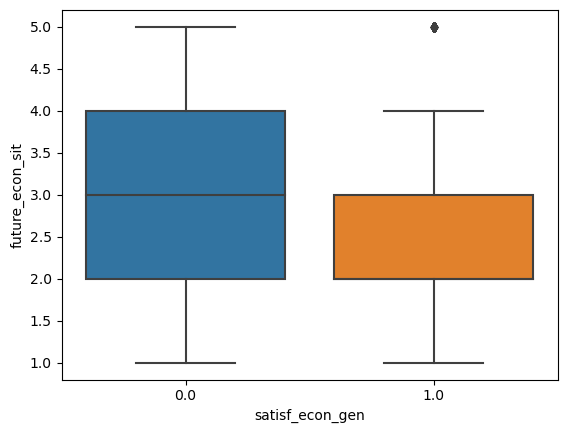

In [53]:
sns.boxplot(data=df, y='future_econ_sit', x='satisf_econ_gen')

In [54]:
df.query('satisf_econ_gen==1 and future_econ_sit==5')

,churchill_q,satis_demo,citiz_count,left_right_scale,satisf_life,all_or_powerful,gov_led_approve,fair_income_dist,past_econ_sit,future_econ_sit,...,retired,dont_work,student,very_con,con,lit_con,not_con,you_vict,relat_vict,social_net
144,2.0,1.0,1.0,10.0,2.0,1.0,0.0,4.0,2.0,5.0,...,0,0,1,0,0,0,0,0,0,6.0
299,1.0,2.0,1.0,5.0,4.0,1.0,0.0,4.0,5.0,5.0,...,0,0,0,0,0,0,1,0,0,2.0
750,2.0,4.0,1.0,5.0,1.0,0.0,0.0,4.0,3.0,5.0,...,0,0,0,0,1,0,0,0,0,0.0
936,2.0,2.0,1.0,4.0,2.0,1.0,0.0,3.0,4.0,5.0,...,1,0,0,0,0,0,0,0,0,0.0
1065,1.0,2.0,1.0,10.0,2.0,0.0,1.0,1.0,1.0,5.0,...,0,0,1,0,0,0,0,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10478,2.0,3.0,1.0,8.0,1.0,1.0,0.0,4.0,4.0,5.0,...,0,0,0,0,0,0,1,0,0,2.0
10569,1.0,2.0,1.0,4.0,2.0,1.0,0.0,3.0,4.0,5.0,...,0,1,0,0,0,0,0,0,1,0.0
10912,1.0,3.0,1.0,2.0,2.0,1.0,1.0,3.0,4.0,5.0,...,0,0,0,0,0,0,1,0,1,4.0
11746,1.0,2.0,1.0,10.0,2.0,1.0,0.0,3.0,5.0,5.0,...,0,0,0,0,1,0,0,0,0,2.0
